# Homework #3: Cross-Validation and Norms

by Francisco Reveriano


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import trange, tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import torch

In [2]:
# Inherit Linear Data
class linearRegression(torch.nn.Module):
    def __init__(self, n_features):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features=n_features, out_features=1)

    def forward(self, x):
        return self.linear(x)

# Read Data
def read_data():
    # The first part is reading the dataset. With Pandas I can treat the dataset as if it was a .csv file.
    data = pd.read_csv("C:/Users/rever/Documents/Pattern_Recognition/Homework03_Cross_Validation_and_Norms/imports-85.data", header=None)

    # At this point the dataset has no header. It is easier for me to place a header to make it easier to choose columns
    headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",
               "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
               "engine-type",
               "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
               "peak-rpm", "city-mpg", "highway-mpg", "price"]

    # We add the headers to the table to make it readable.
    data.columns = headers

    # We can see that there are 26 columns. This means that we need to delete them. And use only the columns we have been assigned.
    # So in other words we are dropping the columns using the panda drop command function.
    data = data.drop(columns=["symboling", "normalized-losses", "make", "fuel-type", "aspiration","num-of-doors", "body-style", "drive-wheels", "engine-location","engine-type", "num-of-cylinders", "fuel-system"])

    # We now proceed to reformat the dataset by first turning all the '?' into 'NaN'
    data["price"] = pd.to_numeric(data["price"], errors='coerce')
    data["bore"] = pd.to_numeric(data["bore"], errors='coerce')
    data["stroke"] = pd.to_numeric(data["stroke"], errors='coerce')
    data["compression-ratio"] = pd.to_numeric(data["compression-ratio"], errors='coerce')
    data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
    data["peak-rpm"] = pd.to_numeric(data["peak-rpm"], errors='coerce')
    # We then proceed to drop the NaN
    data = data.dropna(subset=["price"], axis=0)
    # data = data.dropna(subset=["bore"], axis= 0)
    data = data.dropna()

    # Make a copy of the model
    Model = data.copy()
    return Model


In [3]:
# Function Used to Find the Values of the Ensemble Model
## The Ensemble Model is made from the 30 Folds 
def predict(X, X_Coefficient, Y_Coefficient):
    value = np.dot(X, X_Coefficient) + Y_Coefficient
    return value

## Problem 1

Continuing with the 13 continous predictor variables from the Automobile Data Set from the UCI Machine Learning Respository that you used in Homework #2 to predict a car's price from its characteristics, you are going to further explore the 3 models you proposed in problem 2(a) in Homework #2.


### Part A

The first model I propose is a sort of null model. Basically a model running all of the 13 features. With this model I can establish a baseline to compare the performance of models with smaller features.

price = wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg


In [4]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

# Set Up Linear Regression
Linear_Model = LinearRegression()

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Set Up Linear Regression Model
        Linear_Model.fit(x_train, y_train)
        
        # Linear Regression Coefficient
        Weights_List.append(Linear_Model.coef_)

        # Linear Regression Y Coefficient
        Y_Coefficients.append(Linear_Model.intercept_)
        
        # Linear Model Predict
        y_hat = Linear_Model.predict(x_test)
        
        # Calculate Variance of the whole model using the whole dataset
        y_hat2 = Linear_Model.predict(X)
        var_score = explained_variance_score(y_hat2, Y)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(y_test, y_hat)
        MSE_List.append(MSE)

print("Variance List:", Variance_List)

Variance List: [0.8335630766999427, 0.8387356521901567, 0.8289897072781013, 0.8235774107911162, 0.830945059051229, 0.8191116668566563, 0.832332202224957, 0.8352544723631758, 0.8221592505702322, 0.8469604191047766, 0.8230922525277404, 0.82657798971176, 0.8199072803218428, 0.8373433697064274, 0.830816852415224, 0.835965363543345, 0.8336709105074732, 0.839009213089398, 0.8317420904080146, 0.8365037113416885, 0.8302056733161015, 0.8274547291177154, 0.833676207755043, 0.8330316247605158, 0.8246901490014492, 0.843153543828535, 0.840235223551282, 0.8237834770162558, 0.8304718260159373, 0.8289895186519494]


In [5]:
# Lets Arrange the Ensemble Model
print("Number of models:", len(Variance_List))

# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

Number of models: 30
Coefficient of the Model
[ 7.23628757e+01 -8.92540735e+01  6.18876640e+02  3.17972959e+02
  1.65931783e+00  1.27483369e+02 -9.65808182e+02 -2.99441332e+03
  2.41836401e+02  3.79657313e+01  2.09004019e+00 -3.10371038e+02
  2.84271672e+02]
Y Coefficient -61799.152758566495


In [6]:
predictions = predict(X.values, coefficients,y_coefficient)

#### Part i 

Plot a kernel density estimate for the mean square error (MSE) for this model? 

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 1')

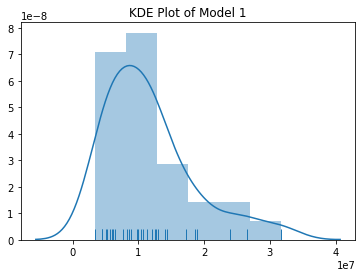

In [7]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

In [8]:
print("MSE:",MSE_List)

MSE: [3475265.0213207356, 9969910.567639997, 8329661.932694798, 10777835.618999446, 6009623.509330513, 26511519.7484552, 5667620.173227927, 11308297.383345382, 12718879.30939971, 23949418.81312288, 13057917.757800976, 4472141.801933071, 12606361.048750851, 10389211.523014678, 18908711.2641386, 9875915.407176109, 6501956.838787773, 18673390.213413466, 5035149.0948091755, 14095172.997886436, 17185539.159019403, 7751256.695527321, 8640228.838579236, 4502739.544901479, 14342694.976986956, 31640377.696913738, 12156233.188607559, 8909870.575655352, 6153747.493105878, 5216033.679619458]


#### Part ii

What is E[MSE] for this model? 

In [9]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 11627756.062472135
Ensemble Model: 9241028.159286913


#### Part iii

Compute the variance for this model. 

In [10]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance 0.8313983307906014
Variance Ensemble Model: 0.8336397381777575


#### Part iv

Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [11]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 11627755.231073804


#### Part v
What is your impression of the variance of this model versus the (bias)^2 + noise variance for this model? 

### Part B

The second model would be the least feature model. Meaning that for this model I would try to use the least amount of features. The features chosen are comming directly from correlation. So this model is at the very low range of the spectrum. And I am dropping features that did not show any correlation with price or anything else in the previous exercises.
price = curb-weight + horsepower + city-mpg

In [12]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["curb-weight", "horsepower", "city-mpg"]]   

# Create the Y Variable in our model
Y = Model["price"]

# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

# Set Up Linear Regression
Linear_Model = LinearRegression()

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Set Up Linear Regression Model
        Linear_Model.fit(x_train, y_train)
        
        # Linear Regression Coefficient
        Weights_List.append(Linear_Model.coef_)

        # Linear Regression Y Coefficient
        Y_Coefficients.append(Linear_Model.intercept_)
        
        # Linear Model Predict
        y_hat = Linear_Model.predict(x_test)
        
        # Calculate Variance of the whole model using the whole dataset
        y_hat2 = Linear_Model.predict(X)
        var_score = explained_variance_score(y_hat2, Y)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(y_test, y_hat)
        MSE_List.append(MSE)

print("Variance List:", Variance_List)

Variance List: [0.7251078424816038, 0.7248299680504148, 0.7113339067675635, 0.7349968022689429, 0.7302798999942341, 0.7117203582163991, 0.716754680482878, 0.701459833089207, 0.7229302050247095, 0.6674194932522362, 0.7232281636260057, 0.7220720284805302, 0.713263430553161, 0.6905140286064098, 0.7198214063435655, 0.7003530329527792, 0.7278329527180987, 0.7227025918609244, 0.7197208497027534, 0.7196905444422295, 0.7205056764105753, 0.7138843299335977, 0.7230110770880236, 0.7279580158254901, 0.7158834447035877, 0.7218324286066373, 0.7259134504532188, 0.6962211485444605, 0.709423345801266, 0.7056346249584251]


In [13]:
# Lets Arrange the Ensemble Model
print("Number of models:", len(Variance_List))

# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients,y_coefficient)

Number of models: 30
Coefficient of the Model
[  8.86903747 110.0130269  220.31673452]
Y Coefficient -26401.50464287917


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model? 

Length of MSE: 30
MSE List [8699717.889883112, 12055076.434419956, 6823880.3363569155, 10800668.603759091, 9105708.504709361, 25213408.075242132, 14351089.719978893, 16595483.796848018, 12384047.406201225, 45521852.90240349, 20136624.924337994, 4170408.3469000733, 13694573.901036024, 26311889.666633595, 16098645.167683994, 28378042.247613817, 7434494.642327122, 10169297.574442282, 10795091.23614325, 13688248.672701085, 8401103.673981432, 27895356.38827107, 8356515.824472633, 12710472.15299599, 10425127.283696437, 15833438.307861526, 8538147.539853979, 17865445.603480946, 20564920.92323599, 22671471.696773104]


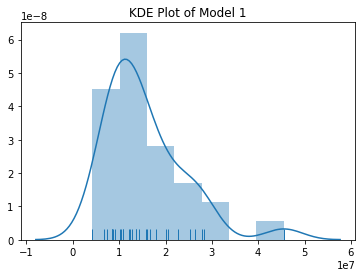

In [14]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

# Print MSE List
print("MSE List", MSE_List)

#### Part ii
What is E[MSE] for this model? 

In [15]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 15523008.314808153
Ensemble Model: 14236435.305020029


#### Part iii
Compute the variance for this model.

In [16]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance 0.7155433187079976
Variance Ensemble Model: 0.7168964997228386


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE.

In [17]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 15523007.599264834


#### Part v¶
What is your impression of the variance of this model versus the (bias)^2 + noise variance for this model? 

### Part C
The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do.

price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio


The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do.
price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio

In [18]:
# We first set a new dataframe
Model = read_data()

# Create the X Variables in our model
X = Model[["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "compression-ratio"]]

# Create the Y Variable in our model
Y = Model["price"]

K = 10
kf = KFold(n_splits=10, shuffle=True)

# Set Up Linear Regression
Linear_Model = LinearRegression()

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        
        # Set Up Linear Regression Model
        Linear_Model.fit(x_train, y_train)
        
        # Linear Regression Coefficient
        Weights_List.append(Linear_Model.coef_)

        # Linear Regression Y Coefficient
        Y_Coefficients.append(Linear_Model.intercept_)
        
        # Linear Model Predict
        y_hat = Linear_Model.predict(x_test)
        
        # Calculate Variance of the whole model using the whole dataset
        y_hat2 = Linear_Model.predict(X)
        var_score = explained_variance_score(y_hat2, Y)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(y_test, y_hat)
        MSE_List.append(MSE)

print("Variance List:", Variance_List)

Variance List: [0.7889078469020968, 0.7866968535766621, 0.7909116115205155, 0.7628893073808057, 0.793167415387568, 0.79489724694269, 0.7918036477815866, 0.7874853480041335, 0.7843473457125046, 0.7918114306023585, 0.7871110136283679, 0.7934219967834224, 0.7991516878895959, 0.7842607370392466, 0.7896721930519515, 0.7868227945607948, 0.7912243349180069, 0.7833658341169414, 0.780002160840058, 0.7749510960340054, 0.7963553697417106, 0.7840081990881479, 0.777113997263054, 0.7926749910927793, 0.7831174216273781, 0.7705116512606273, 0.7961828765759854, 0.7879163057799128, 0.792228930594801, 0.7912947884479741]


In [19]:
# Lets Arrange the Ensemble Model
print("Number of models:", len(Variance_List))

# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients,y_coefficient)

Number of models: 30
Coefficient of the Model
[ 39.44165628   1.6497424  100.98582286  53.15921941 -39.2964544
 187.28128916]
Y Coefficient -17173.546394332072


#### Part i
Plot a kernel density estimate for the mean square error (MSE) for this model? 

Length of MSE: 30
MSE List [5558013.242779309, 10893596.202763062, 4514322.709648291, 27600997.16116176, 20332398.894976847, 17138436.43642247, 9973148.107825411, 10706439.434016012, 5178110.42696459, 11763873.998269372, 7943629.68251498, 13471873.514790496, 14259381.887911782, 16124775.428782562, 12007853.16659804, 16025752.11771171, 6503558.171726294, 15364441.944682676, 18031426.914299447, 7935394.54877998, 10162774.106341928, 18625187.989423465, 14111522.221762428, 5182933.373652652, 15836069.990088576, 21006303.08759446, 10465138.891078375, 16656740.469380558, 7635909.766779077, 5057971.204274125]


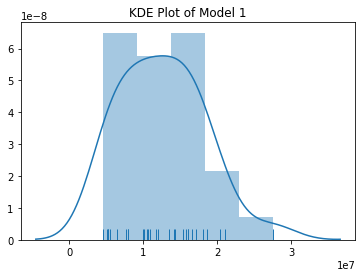

In [20]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

# Print MSE List
print("MSE List", MSE_List)

#### Part ii
What is E[MSE] for this model? 

In [21]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 12535599.16976669
Ensemble Model: 11274912.60142882


#### Part iii
Compute the variance for this model.

In [22]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance 0.7871435478048561
Variance Ensemble Model: 0.7883157502232586


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE.

In [23]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 12535598.382623143


#### Part v
What is your impression of the variance of this model versus the (bias)^2 + noise variance for this model? 

## Problem 2

### Part A

The first model I propose is a sort of null model. Basically a model running all of the 13 features. With this model I can establish a baseline to compare the performance of models with smaller features.

price = wheel-base + length + width + height + curb-weight + engine-size + bore + stroke + compression-ratio + horsepower + peak-rpm + city-mpg + highway-mpg

In [24]:
# We first set a new dataframe
Model = read_data()
Model2 = read_data()

# Create the X Variables in our model
X = Model[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    
X2 = Model2[["wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]]    

print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]
Y2 = Model2["price"]


# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.0001
        epochs = 2000

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        #criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()
        
        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())
        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()
        
        # Calculate the Variance for each model
        Y2_tensor = torch.tensor(Y2.values)                                           # Turn X Dataframe to Tensors
        X2_tensor =torch.tensor(X2.values)                                            # Turn Y Dataframe to Tensors
        y_hat2 = model(X2_tensor.float())                                             # Calculate Prediction
        var_score = explained_variance_score(y_hat2.detach().numpy(), Y2_tensor)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

        w = list(model.parameters())
        #print(w.detach())
        #for param in model.parameters():
        Weights_List.append(w[0].detach().numpy())
        Y_Coefficients.append(w[1].detach().numpy())
        
print(MSE_List)


Shape of X: (195, 13)
[11043045.501345182, 47088647.5651564, 36020488.0294412, 8846868.23910203, 37724303.903984025, 32887066.44429518, 5565536.506938733, 17232849.892074585, 55762609.498380564, 12899671.101538494, 26794592.2079862, 7773809.752876329, 11055747.780376673, 50757976.69566649, 15029837.801299429, 36168182.061356485, 24421710.668555472, 49271343.391359076, 9564980.531154783, 32293427.958719417, 10028118.130258024, 31986122.911711704, 39644097.117211245, 15507340.306316173, 31858104.266393565, 49313892.433118016, 36808481.715252616, 4434312.148174474, 14910415.740241552, 28370341.40125425]


In [25]:
# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Ensemble Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients.T, y_coefficient)

# First Five Value Prediction Comparison
for k in range(5):
    print("Actual:", Y2[k], "Prediction:",predictions[k])

Coefficient of the Ensemble Model
[[-5.2469623e-01 -7.5173771e-01 -3.3456260e-01 -3.8301784e-01
   8.6555624e+00  1.5414445e+00 -4.6453620e-03  2.3954488e-02
  -1.1383342e-01  2.1437070e+00 -1.9428577e+00 -5.8141911e-01
  -5.4023039e-01]]
Y Coefficient 0.033196453
Actual: 13495.0 Prediction: [12537.16616412]
Actual: 16500.0 Prediction: [12537.16616412]
Actual: 16500.0 Prediction: [15038.51553918]
Actual: 13950.0 Prediction: [9669.7403622]
Actual: 17450.0 Prediction: [13962.66743608]


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 1')

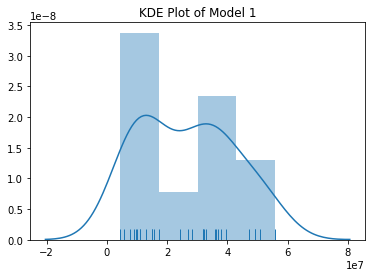

In [26]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 1")

#### Part ii

What is E[MSE] for this model?

In [27]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 26368797.390051283
Ensemble Model: 25674518.046210136


#### Part iii

Compute the variance for this model? 

In [28]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance -0.020057574594077147
Variance Ensemble Model: -0.012245356712170974


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [29]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 26368797.410108857


### Part B

The second model would be the least feature model. Meaning that for this model I would try to use the least amount of features. The features chosen are comming directly from correlation. So this model is at the very low range of the spectrum. And I am dropping features that did not show any correlation with price or anything else in the previous exercises.

price = curb-weight + horsepower + city-mpg

In [30]:
# We first set a new dataframe
Model = read_data()
Model2 = read_data()

# Create the X Variables in our model
X = Model[["curb-weight", "horsepower", "city-mpg"]]    
X2 = Model2[["curb-weight", "horsepower", "city-mpg"]]

print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]
Y2 = Model2["price"]


# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.0001
        epochs = 3000

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        #criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()
        
        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())
        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()
        
        # Calculate the Variance for each model
        Y2_tensor = torch.tensor(Y2.values)                                           # Turn X Dataframe to Tensors
        X2_tensor =torch.tensor(X2.values)                                            # Turn Y Dataframe to Tensors
        y_hat2 = model(X2_tensor.float())                                             # Calculate Prediction
        var_score = explained_variance_score(y_hat2.detach().numpy(), Y2_tensor)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

        w = list(model.parameters())
        #print(w.detach())
        #for param in model.parameters():
        Weights_List.append(w[0].detach().numpy())
        Y_Coefficients.append(w[1].detach().numpy())
        
print(MSE_List)

Shape of X: (195, 3)
[13872942.857326318, 32520049.403989315, 21784073.708464004, 44607180.40791144, 16346308.24316951, 48045094.47168139, 34604968.57553372, 117716273.38556325, 73205068.93186449, 24019157.284949515, 142865255.11065325, 38033210.79754305, 13253537.327102054, 8081244.543683541, 114747421.27148867, 15747826.458904417, 15979103.553461075, 8055550.694087681, 35658937.379881, 26632769.128871515, 70828662.51131158, 75205343.69528504, 11257500.046739483, 24397707.73473979, 61477844.68406019, 30893935.798071373, 61735883.79374534, 44109453.406881735, 24871793.12744979, 13026541.283011839]


In [31]:
# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Ensemble Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients.T, y_coefficient)

# First Five Value Prediction Comparison
for k in range(5):
    print("Actual:", Y2[k], "Prediction:",predictions[k])

Coefficient of the Ensemble Model
[[ 4.3123474  3.102001  -2.2058628]]
Y Coefficient -0.019055609
Actual: 13495.0 Prediction: [11285.84113812]
Actual: 16500.0 Prediction: [11285.84113812]
Actual: 16500.0 Prediction: [12609.5344429]
Actual: 13950.0 Prediction: [10341.40023732]
Actual: 17450.0 Prediction: [12495.07461595]


#### Part i
Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 2')

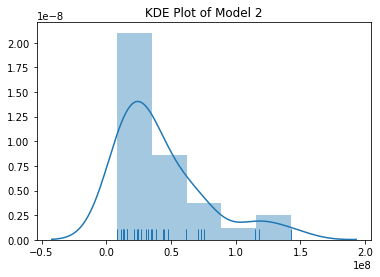

In [32]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 2")

#### Part ii
What is E[MSE] for this model?

In [33]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 42119354.653914176
Ensemble Model: 41929504.45282756


#### Part iii
Compute the variance for this model? 

In [34]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance -5.858490094986412
Variance Ensemble Model: -5.856435944203785


#### Part iv
Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [35]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 42119360.51240427


### Part C

The third model would be a more balanced model. I would try to drop some features but include a few more that were in the medium correlation levels. This should be a more balanced model that is probably closer to what Lasso or PCA would tell me to do.

price = length + curb-weight + engine-size + horsepower + city-mpg + compression-ratio

In [36]:
# We first set a new dataframe
Model = read_data()
Model2 = read_data()

# Create the X Variables in our model
X = Model[["length", "curb-weight", "engine-size","horsepower", "city-mpg", "compression-ratio"]]    
X2 = Model2[["length", "curb-weight", "engine-size","horsepower", "city-mpg", "compression-ratio"]]
print("Shape of X:",X.shape)

# Create the Y Variable in our model
Y = Model["price"]
Y2 = Model2["price"]


# Set Up The K-Folds
K = 10
kf = KFold(n_splits=10, shuffle=True)

MSE_List = []
Variance_List = []
Weights_List = []
Y_Coefficients = []
Weights_List = []
Y_Coefficients = []
for i in range(3):
    for train_index, test_index in kf.split(X):
        # Split the Dataset
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        # Turn values into tensors
        X_train_tensor = torch.tensor(x_train.values)
        X_test_tensor = torch.tensor(x_test.values)
        Y_train_tensor = torch.tensor(y_train.values).reshape(-1, 1)
        Y_test_tensor = torch.tensor(y_test.values).reshape(-1,1)

        # Set up the Model
        Num_Features = X.shape[1]  # takes variable 'x'
        outputDim = 1  # takes variable 'y'
        learningRate = 0.0001
        epochs = 3000

        model = linearRegression(Num_Features)
        criterion = torch.nn.L1Loss()
        #criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

        # Run through the model
        for j in range(epochs):
            # Clear Gradients
            optimizer.zero_grad()
            # Run Model
            outputs = model.forward(X_train_tensor.float())
            # Get Lost for Predicted Output
            loss = criterion(outputs, Y_train_tensor.float())
            # Backward Propogation
            loss.backward()
            # Update Parameters
            optimizer.step()
        
        # Test Prediction of the Model
        optimizer.zero_grad()
        y_hat = model(X_test_tensor.float())
        # Calculate MSE
        ## Convert to Numpy
        y_hat = y_hat.detach().numpy()
        Y_test_tensor = Y_test_tensor.numpy()
        
        # Calculate the Variance for each model
        Y2_tensor = torch.tensor(Y2.values)                                           # Turn X Dataframe to Tensors
        X2_tensor =torch.tensor(X2.values)                                            # Turn Y Dataframe to Tensors
        y_hat2 = model(X2_tensor.float())                                             # Calculate Prediction
        var_score = explained_variance_score(y_hat2.detach().numpy(), Y2_tensor)
        Variance_List.append(var_score)
        
        ## Now I can calculate the MSE using Scikit Learning
        MSE = mean_squared_error(Y_test_tensor, y_hat)
        MSE_List.append(MSE)

        w = list(model.parameters())
        #print(w.detach())
        #for param in model.parameters():
        Weights_List.append(w[0].detach().numpy())
        Y_Coefficients.append(w[1].detach().numpy())
        
print(MSE_List)

Shape of X: (195, 6)
[36442005.025756024, 13275359.788307106, 29165693.517235897, 76073665.6566093, 13179183.429638112, 55271127.21954737, 25012096.642772786, 3036575.6801284114, 56059268.91337033, 101104744.49046122, 86067479.02015562, 13582928.676999617, 3425615.883890116, 47501308.82300955, 27640657.85770874, 54432410.12565833, 44133979.83847062, 49175571.29407466, 32388702.620277617, 50596494.138829745, 31064810.658841908, 98289562.06605735, 56454791.20938754, 31969869.5798555, 43086591.14515767, 6978136.336717807, 48719870.53665554, 13869888.70237949, 18738291.19655491, 58377431.35039119]


In [37]:
# Coefficient of Model
coefficients = np.mean(Weights_List, axis=0)
print("Coefficient of the Ensemble Model")
print(coefficients)

# Y Coefficient
y_coefficient = np.mean(Y_Coefficients)
print("Y Coefficient", y_coefficient)

# Calculate Predictions
predictions = predict(X.values, coefficients.T, y_coefficient)

# First Five Value Prediction Comparison
for k in range(5):
    print("Actual:", Y2[k], "Prediction:",predictions[k])

Coefficient of the Ensemble Model
[[-4.4816484   4.509805    2.0587199   3.1256793  -2.1548066  -0.29349086]]
Y Coefficient -0.06702181
Actual: 13495.0 Prediction: [11301.10600078]
Actual: 16500.0 Prediction: [11301.10600078]
Actual: 16500.0 Prediction: [12714.55213358]
Actual: 13950.0 Prediction: [10236.45810385]
Actual: 17450.0 Prediction: [12542.46832575]


#### Part i

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold yields an estimate of MSE; find the kernel density estimate using the 30 samples of MSE)

Length of MSE: 30


Text(0.5, 1.0, 'KDE Plot of Model 3')

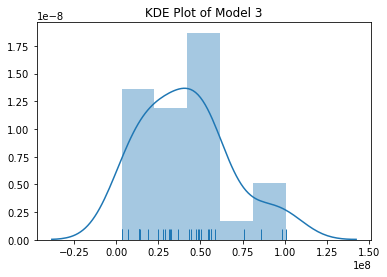

In [38]:
# Make sure MSE List is 30
print("Length of MSE:", len(MSE_List))

# Plot KDE of MSE
sns.distplot(MSE_List, kde=True, rug=True)
plt.title("KDE Plot of Model 3")

#### Part ii

What is E[MSE] for this model?

In [39]:
# From the 30 MSE Values
Expected_Value = np.average(MSE_List)
print("Expected Average:", Expected_Value)

# From MSE From the Ensemble Model
## Still an Insane Number
MSE_Ensemble_Model = mean_squared_error(predictions,Y.values)
print("Ensemble Model:", MSE_Ensemble_Model)

Expected Average: 40837137.04749666
Ensemble Model: 40612983.40866019


#### Part iii

Compute the variance for this model? 

In [40]:
# My variance of the model is calculated using the SCKLEARN Variance Calculation of model
# Since this model ran 30 times effectively. This is the average variance of each of the 30 models. 
Expected_Variance = np.average(Variance_List)
print("Expected Variance", Expected_Variance)

## Calculate the Variance Of Ensembe Model 
Variance_Ensemble_Model = explained_variance_score(predictions, Y.values)
print("Variance Ensemble Model:", Variance_Ensemble_Model)

Expected Variance -4.944644459179122
Variance Ensemble Model: -4.943472961763116


#### Part iv

Find the (bias)^2 + noise variance for this model, assuming E[MSE] is a good approximation for MSE. 

In [41]:
# Calculate Using the Formula
## Value Needs to be Normalized  to make sense
bias_squared_noise_variance = Expected_Value - Expected_Variance
print("Bias^2 + Noise Variance:", bias_squared_noise_variance)

Bias^2 + Noise Variance: 40837141.99214112
